In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
df_sample = df.sample(50000, random_state=42)

In [11]:
# write to csv
df_sample.to_csv('../data/onlinefraud_sample.csv', index=False)

In [6]:
print(df.shape)
print(df.dtypes)
print(df['isFraud'].value_counts(normalize=True))
print(df['isFlaggedFraud'].value_counts(normalize=True))

(6362620, 11)
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64
isFlaggedFraud
0    0.999997
1    0.000003
Name: proportion, dtype: float64


In [4]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


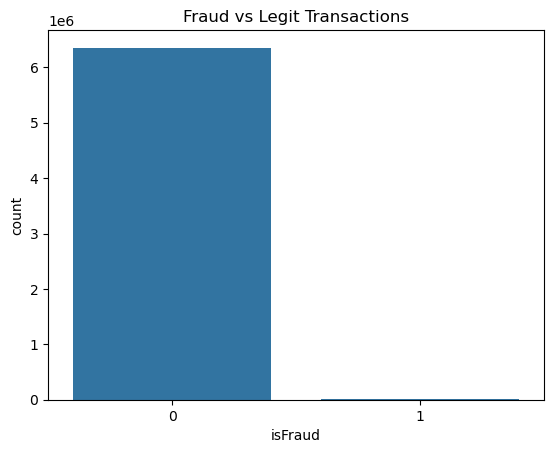

<Figure size 640x480 with 0 Axes>

In [5]:
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Legit Transactions")
plt.show()
plt.savefig("../output/countplot.png", bbox_inches='tight', dpi=300)

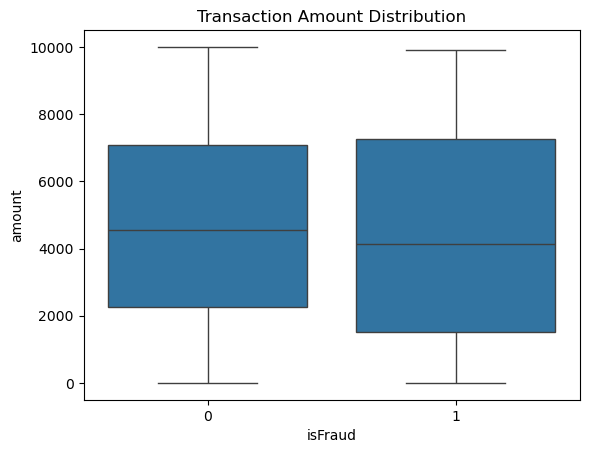

In [9]:
sns.boxplot(data=df[df['amount'] < 10000], x='isFraud', y='amount')
plt.title("Transaction Amount Distribution")
plt.show()

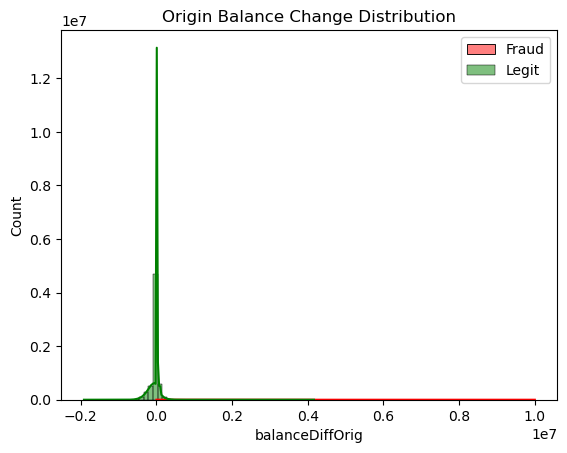

In [10]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

sns.histplot(df[df['isFraud'] == 1]['balanceDiffOrig'], bins=50, color='red', label='Fraud', kde=True)
sns.histplot(df[df['isFraud'] == 0]['balanceDiffOrig'], bins=50, color='green', label='Legit', kde=True)
plt.legend()
plt.title("Origin Balance Change Distribution")
plt.show()

In [6]:
df = df.drop(['nameOrig', 'nameDest', ], axis=1)

df = pd.get_dummies(df, columns=['type'], drop_first=True)

df['orig_balance_ratio'] = df['newbalanceOrig'] / (df['oldbalanceOrg'] + 1)
df['dest_balance_ratio'] = df['newbalanceDest'] / (df['oldbalanceDest'] + 1)


In [8]:
df = df.drop(['isFlaggedFraud', ], axis=1)

In [9]:
from collections import Counter

Counter(df['isFraud'])


Counter({0: 6354407, 1: 8213})

In [10]:
df.to_csv("../data/cleaned_transactions.csv", index=False)

: 